In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.vecm import VECM, select_order, select_coint_rank
%matplotlib inline

In [ ]:
CPI=pd.read_excel('/Users/zackienzle/CBA/data/AUCPI Index.xlsx', header=5)
IOCR = pd.read_excel('/Users/zackienzle/CBA/data/RBACOR Index.xlsx', header=5)
GTAUD1YR = pd.read_excel('/Users/zackienzle/CBA/data/GTAUD1YR Corp.xlsx', header=5)
GTAUD2YR = pd.read_excel('/Users/zackienzle/CBA/data/GTAUD2YR Corp.xlsx', header=5)
GTAUD3YR = pd.read_excel('/Users/zackienzle/CBA/data/GTAUD3YR Corp.xlsx', header=5)
GTAUD5YR = pd.read_excel('/Users/zackienzle/CBA/data/GTAUD5YR Corp.xlsx', header=5)
GTAUD10YR = pd.read_excel('/Users/zackienzle/CBA/data/GTAUD10YR Corp.xlsx', header=5)
GTAUD1YR

cols = {
    'CPI': CPI,
    'IOCR': IOCR,
    'GTAUD1YR': GTAUD1YR,
    'GTAUD2YR': GTAUD2YR,
    'GTAUD3YR': GTAUD3YR,
    'GTAUD5YR': GTAUD5YR,
    'GTAUD10YR': GTAUD10YR
}

px_last_series = {
    name: data['PX_LAST']
    for name, data in cols.items() if 'PX_LAST' in data.columns
}

df = pd.DataFrame(px_last_series).dropna()
print(df)
df.info()

In [ ]:
plt.figure(figsize=(10, 8))
ax1 = plt.subplot(211)
ax1.plot(df.index, df["CPI"])
ax1.set_title("CPI Time Series")
ax1.set_ylabel("CPI Value")
ax1.grid(True, linestyle=':', alpha=0.6)

ax2 = plt.subplot(212)
ax2.plot(df.index, df["IOCR"])
ax2.set_title("IOCR Time Series")
ax2.set_ylabel("IOCR Value")
ax2.set_xlabel("Date")
ax2.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()


 VECM Order Selection (* highlights the minimums)
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -50.43     -49.39*   1.251e-22     -50.02*
1     -50.44*      -48.79  1.246e-22*      -49.78
2      -50.40      -48.14   1.298e-22      -49.50
3      -50.32      -47.46   1.405e-22      -49.18
4      -50.21      -46.74   1.574e-22      -48.82
5      -50.10      -46.02   1.780e-22      -48.46
6      -50.01      -45.32   1.957e-22      -48.14
7      -49.98      -44.68   2.052e-22      -47.86
8      -49.89      -43.98   2.289e-22      -47.52
-------------------------------------------------
1 0 1 0
Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   7          156.8          139.3
  1   7          92.33          107.3
-------------------------------------
1
Det. terms outside the coint. relation & lagged endog. parameters fo

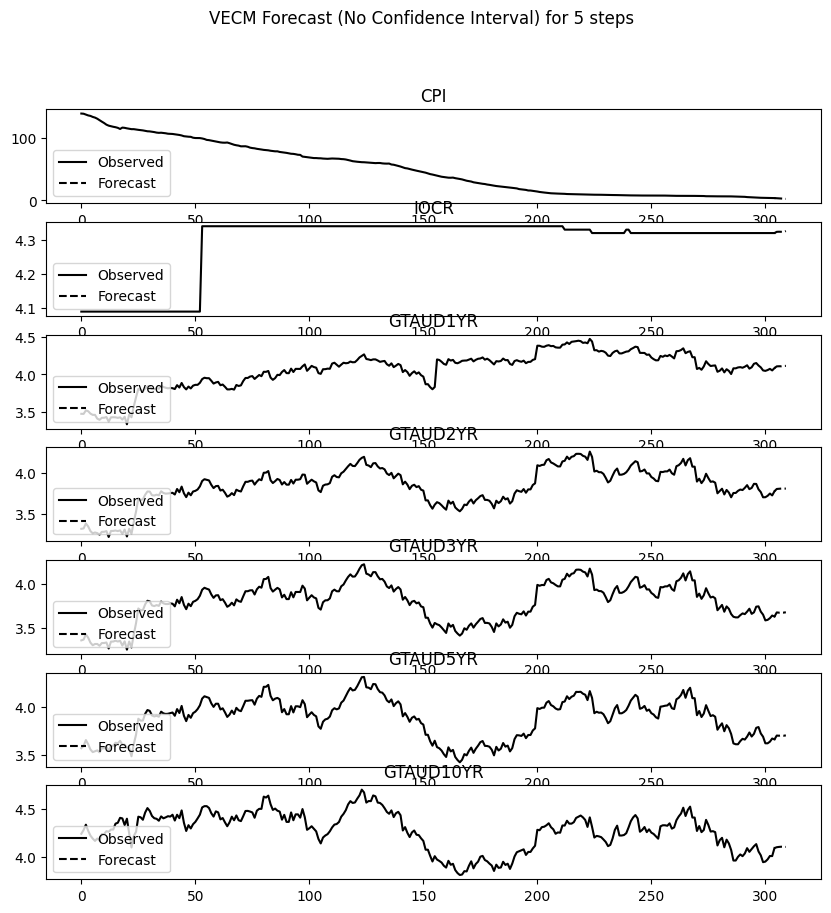

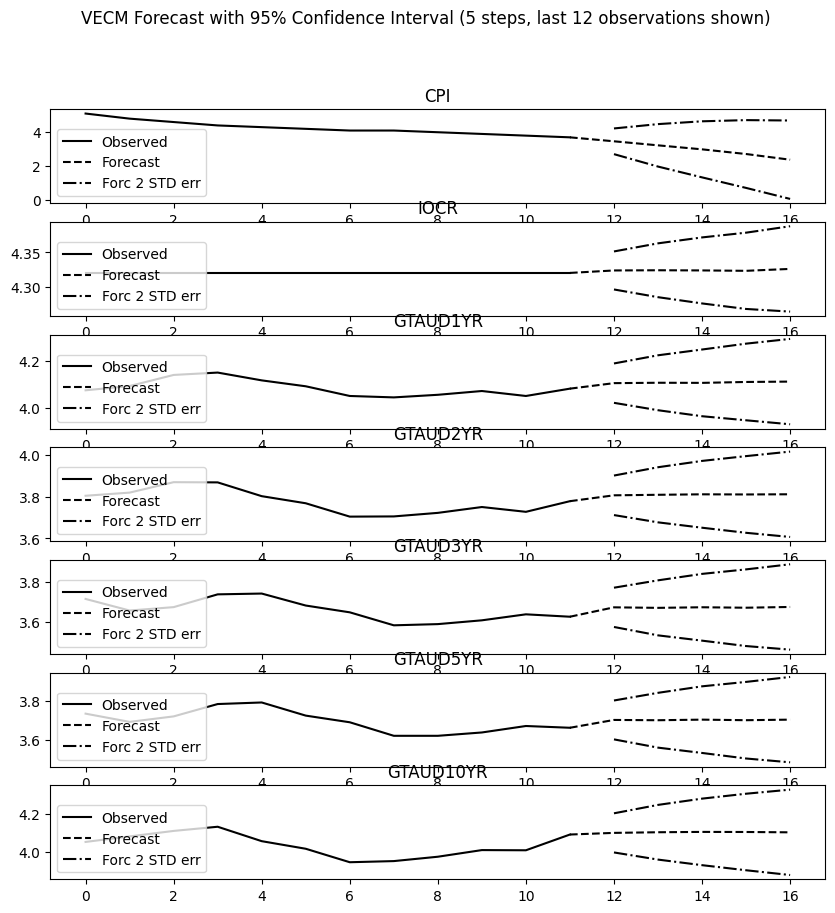

[[ 1.31496585e+00 -1.94817037e+00  8.63153089e-01 -4.00419314e+00
   6.27862378e+00 -5.29191986e+00  2.75081469e+00]
 [ 2.46499374e-03  9.98847012e-01 -1.80756144e-03  9.41358744e-03
  -1.94399006e-02  2.09075339e-02  7.77677681e-04]
 [ 9.03773515e-03  5.19613275e-02  9.04986966e-01 -3.40362658e-02
   2.53933941e-01 -4.49782703e-01  2.99160408e-01]
 [ 1.68265142e-02  8.40110421e-02 -1.75367137e-01  9.73522056e-01
   4.24157048e-01 -6.78708185e-01  3.76897388e-01]
 [ 1.94531138e-02  8.43066504e-02 -2.10263765e-01  1.75464618e-01
   1.27274079e+00 -7.30176474e-01  4.28851354e-01]
 [ 1.54365686e-02  1.00127345e-01 -2.56482834e-01  1.39163157e-01
   5.83975146e-01  3.85531868e-02  4.17230613e-01]
 [ 1.10561048e-02  7.48639468e-02 -2.89632574e-01 -3.33467892e-02
   9.96919841e-01 -1.05858964e+00  1.26232315e+00]]
[[[ 1.31496585e+00 -1.94817037e+00  8.63153089e-01 -4.00419314e+00
    6.27862378e+00 -5.29191986e+00  2.75081469e+00]
  [ 2.46499374e-03  9.98847012e-01 -1.80756144e-03  9.4135874

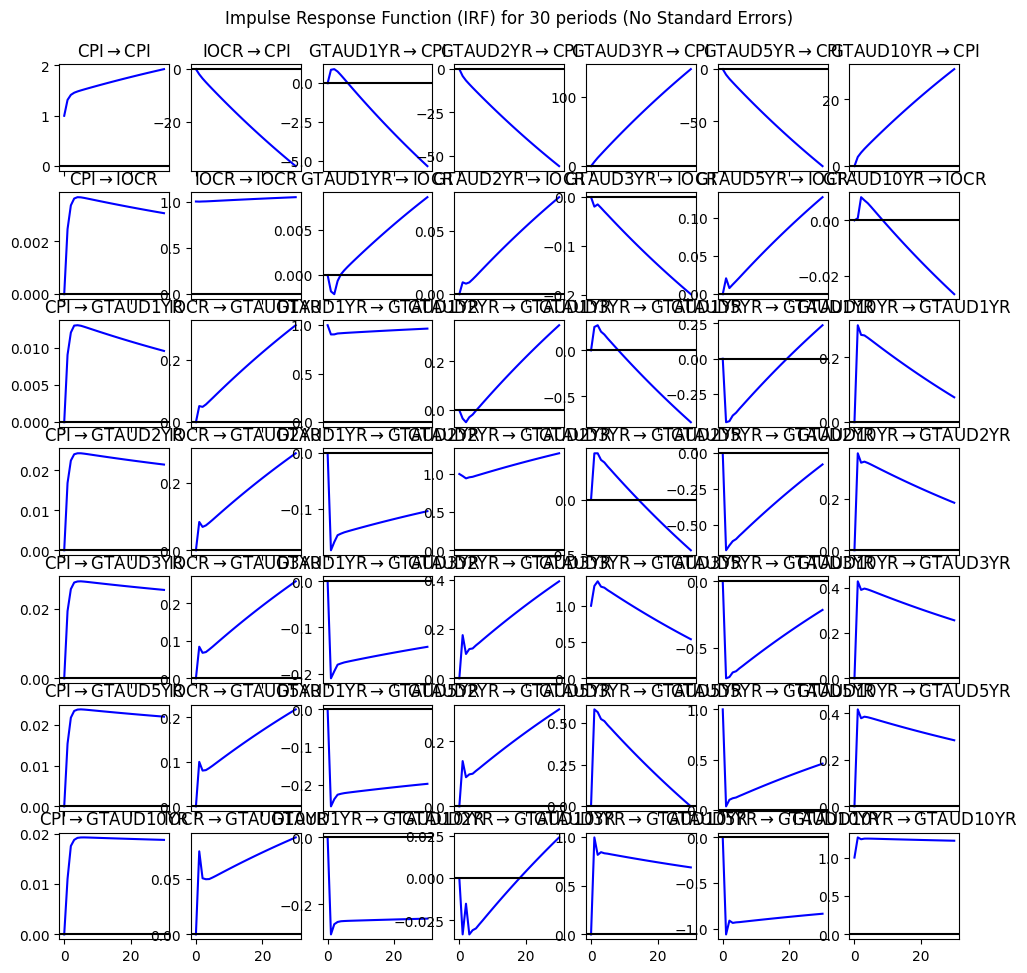

normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
     1.115e+06          23.68   0.000 14
----------------------------------------
1115325.7681123319 23.68479130484058 0.0
Adjusted Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 12 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value  df
-----------------------------------------
         602.9          586.8   0.018 532
-----------------------------------------
602.9021394431795 586.7662440012699 0.017681475128391203


In [9]:
max_lags_calc = int(len(df) / (len(df.columns) * 5))
max_lags_select = min(10, max_lags_calc)
lag_order = select_order(data=df, maxlags=max_lags_select, deterministic="ci", seasons=4)
print(lag_order.summary())
print(lag_order.aic, lag_order.bic, lag_order.fpe, lag_order.hqic)

# Select the cointegration rank
k_ar_diff_for_rank_test = lag_order.aic
rank_test = select_coint_rank(df, det_order=k_ar_diff_for_rank_test, k_ar_diff=k_ar_diff_for_rank_test, method="trace", signif=0.05)
print(rank_test.summary())
print(rank_test.rank)

# Fit the VECM model
k_ar_diff_final = lag_order.aic
coint_rank_final = rank_test.rank
model = VECM(df, deterministic="ci", seasons=4,
             k_ar_diff=k_ar_diff_final,
             coint_rank=coint_rank_final)
vecm_res = model.fit()
print(vecm_res.summary())
print(vecm_res.alpha)
print(vecm_res.stderr_alpha)

# Predictions
steps_to_predict = 5
forecast = vecm_res.predict(steps=steps_to_predict)
print(forecast)

forecast_ci = vecm_res.predict(steps=steps_to_predict, alpha=0.05)
for text, values in zip(("forecast", "lower", "upper"), forecast_ci):
    print(text+":", values, sep="\n")

# Plot Forecasts
vecm_res.plot_forecast(steps=steps_to_predict, plot_conf_int=False)
plt.suptitle(f"VECM Forecast (No Confidence Interval) for {steps_to_predict} steps")
plt.show()

n_last_obs_to_show = 12
vecm_res.plot_forecast(steps=steps_to_predict, n_last_obs=n_last_obs_to_show)
plt.suptitle(f"VECM Forecast with 95% Confidence Interval ({steps_to_predict} steps, last {n_last_obs_to_show} observations shown)")
plt.show()


# VAR and MA Representations
print(vecm_res.var_rep[0])
print(vecm_res.var_rep)
ma_order = 2
print(vecm_res.ma_rep(maxn=ma_order))

# Granger Causality Tests
# Using the first two columns for Granger causality tests as examples
caused_var1 = df.columns[0]
caused_var2 = df.columns[1]

granger_results_var1 = vecm_res.test_granger_causality(caused=caused_var1, signif=0.05)
print(granger_results_var1.summary())
print(granger_results_var1.signif, granger_results_var1.pvalue)

granger_results_var2 = vecm_res.test_granger_causality(caused=caused_var2, signif=0.05)
print(granger_results_var2.summary())
print(granger_results_var2.signif, granger_results_var2.pvalue)

# Instantaneous Causality Tests
# Using the first two columns for instantaneous causality tests as examples
causing_var1 = df.columns[0]
causing_var2 = df.columns[1]

inst_caus_var1 = vecm_res.test_inst_causality(causing=causing_var1)
print(inst_caus_var1.summary())

inst_caus_var2 = vecm_res.test_inst_causality(causing=causing_var2)
print(inst_caus_var2.summary())

# Impulse Response Function (IRF)
num_periods_irf = 30
ir = vecm_res.irf(periods=num_periods_irf)
ir.plot(plot_stderr=False)
plt.suptitle(f"Impulse Response Function (IRF) for {num_periods_irf} periods (No Standard Errors)")
plt.show()

# Residual Diagnostics: Normality Test
norm_test = vecm_res.test_normality()
print(norm_test.summary())
print(norm_test.test_statistic, norm_test.crit_value, norm_test.pvalue)

# Residual Diagnostics: Whiteness Test (Autocorrelation)
nlags_white_test = 12
white_test = vecm_res.test_whiteness(nlags=nlags_white_test, adjusted=True)
print(white_test.summary())
print(white_test.test_statistic, white_test.crit_value, white_test.pvalue)